In [1]:
%matplotlib notebook

from IPython.display import Image
from simplify.face_lattice import *
from simplify.simplify import *
from simplify.plot import *
from simplify.homothety import *
from islpy import *
from IPython.display import Image
import networkx as nx
import graphviz as gv

In [11]:
op = 'max'
fp = '[N,M]->{[i,j,k]->[i,j]}'
fd = '[N,M]->{[i,j,k]->[k]}'
s = '[N,M]->{[i,j,k] : k<=i,j<=N+k and 0<=k<=M}'

k = len(fd.split('-')[-2].split(',')) - len(fd.split('-')[-1].split(','))
successes = start(op, fp, s, fd, k)

constraints:
c0	[[ 0  0  1  0  0  0]	[N, M] -> { [i, j, k] : k >= 0 }
c1	 [-1  0  1  1  0  0]	[N, M] -> { [i, j, k] : N - i + k >= 0 }
c2	 [ 0 -1  1  1  0  0]	[N, M] -> { [i, j, k] : N - j + k >= 0 }
c3	 [ 0  1 -1  0  0  0]	[N, M] -> { [i, j, k] : j - k >= 0 }
c4	 [ 1  0 -1  0  0  0]	[N, M] -> { [i, j, k] : i - k >= 0 }
c5	 [ 0  0 -1  0  1  0]]	[N, M] -> { [i, j, k] : M - k >= 0 }

---
@{} STEP A.1 - if k==0 return else continue. k=2
@{} 
@{} node = {}
@{} fp = [N,M]->{[i,j,k]->[i,j]}
@{} fd = [N,M]->{[i,j,k]->[k]}
@{} 
@{} STEP A.2 - identify boundaries given fp
@{} 
@{} {5} BoundaryLabel.NON_BOUNDARY
@{} {4} BoundaryLabel.NON_BOUNDARY
@{} {3} BoundaryLabel.NON_BOUNDARY
@{} {2} BoundaryLabel.NON_BOUNDARY
@{} {1} BoundaryLabel.NON_BOUNDARY
@{} {0} BoundaryLabel.NON_BOUNDARY
@{} 
@{} STEP A.3 - construct list of candidate facets (i.e., non-boundary facets)
@{} 
@{} candidate_facets = [{5}, {4}, {3}, {2}, {1}, {0}]
@{} 
@{} STEP A.4 - determine all possible combos
@{} 
@{} ['{5}', '{4}',

@{}:@{3} {3, 4} BoundaryLabel.STRICT_BOUNDARY
@{}:@{3} {2, 3} BoundaryLabel.STRICT_BOUNDARY
@{}:@{3} {1, 3} BoundaryLabel.STRICT_BOUNDARY
@{}:@{3} {0, 3} BoundaryLabel.STRICT_BOUNDARY
@{}:@{3} 
@{}:@{3} STEP A.3 - construct list of candidate facets (i.e., non-boundary facets)
@{}:@{3} 
@{}:@{3} candidate_facets = []
@{}:@{3} 
@{}:@{3} STEP A.4 - determine all possible combos
@{}:@{3} 
@{}:@{3} []
@{}:@{3} --
@{}:@{3} []  possible -> rho = [N = 0, M = 0] -> { [-1, 0, 0] }
@{}:@{3} 
@{}:@{3} STEP A.5 - prune out redundant possible combos
@{}:@{3} 
@{}:@{3} []
@{}:@{3} --
@{}:@{3} []  -> rho = [N = 0, M = 0] -> { [-1, 0, 0] }
@{}:@{3} 
@{}:@{3} STEP A.6 - incorporate boundary facets
@{}:@{3} 
@{}:@{3} [] ['{3, 4}', '{2, 3}', '{1, 3}', '{0, 3}']
@{}:@{3} -------------------------------------------
@{}:@{3} [] ['INV', 'inward', 'INV', 'outward']  -> rho = [N = 0, M = 0] -> { [-1, 0, 0] }
@{}:@{3} 
@{}:@{3} STEP A.7 - recurse into "ADD" and "inward" boundary facets
@{}:@{3} 
@{}:@{3} recursi

@{}:@{2} candidate_facets = []
@{}:@{2} 
@{}:@{2} STEP A.4 - determine all possible combos
@{}:@{2} 
@{}:@{2} []
@{}:@{2} --
@{}:@{2} []  possible -> rho = [N = 0, M = 0] -> { [-1, 0, 0] }
@{}:@{2} 
@{}:@{2} STEP A.5 - prune out redundant possible combos
@{}:@{2} 
@{}:@{2} []
@{}:@{2} --
@{}:@{2} []  -> rho = [N = 0, M = 0] -> { [-1, 0, 0] }
@{}:@{2} 
@{}:@{2} STEP A.6 - incorporate boundary facets
@{}:@{2} 
@{}:@{2} [] ['{2, 4}', '{2, 3}', '{1, 2}', '{0, 2}']
@{}:@{2} -------------------------------------------
@{}:@{2} [] ['INV', 'outward', 'INV', 'inward']  -> rho = [N = 0, M = 0] -> { [-1, 0, 0] }
@{}:@{2} 
@{}:@{2} STEP A.7 - recurse into "ADD" and "inward" boundary facets
@{}:@{2} 
@{}:@{2} recursing into {0, 2} facet
@{}:@{2} 
@{}:@{0, 2} STEP A.1 - if k==0 return else continue. k=0
@{}:@{0, 2} 
@{}:@{0, 2} SUCCESS
@{}:@{2} 
@{}:@{2} 
@{}:@{2} STEP C - reduction decomposition
@{}:@{2} 
@{}:@{2} STEP C.1 - is decomposition feasible?
@{}:@{2} 
@{}:@{2} decomposition not feasible f

[N, M] -> { [i, j, k] : j < i and k >= 0 and -N + i <= k <= j and k <= M }
[N, M] -> { [i, j, k] : j >= i and k >= 0 and -N + j <= k <= i and k <= M }


<IPython.core.display.Javascript object>


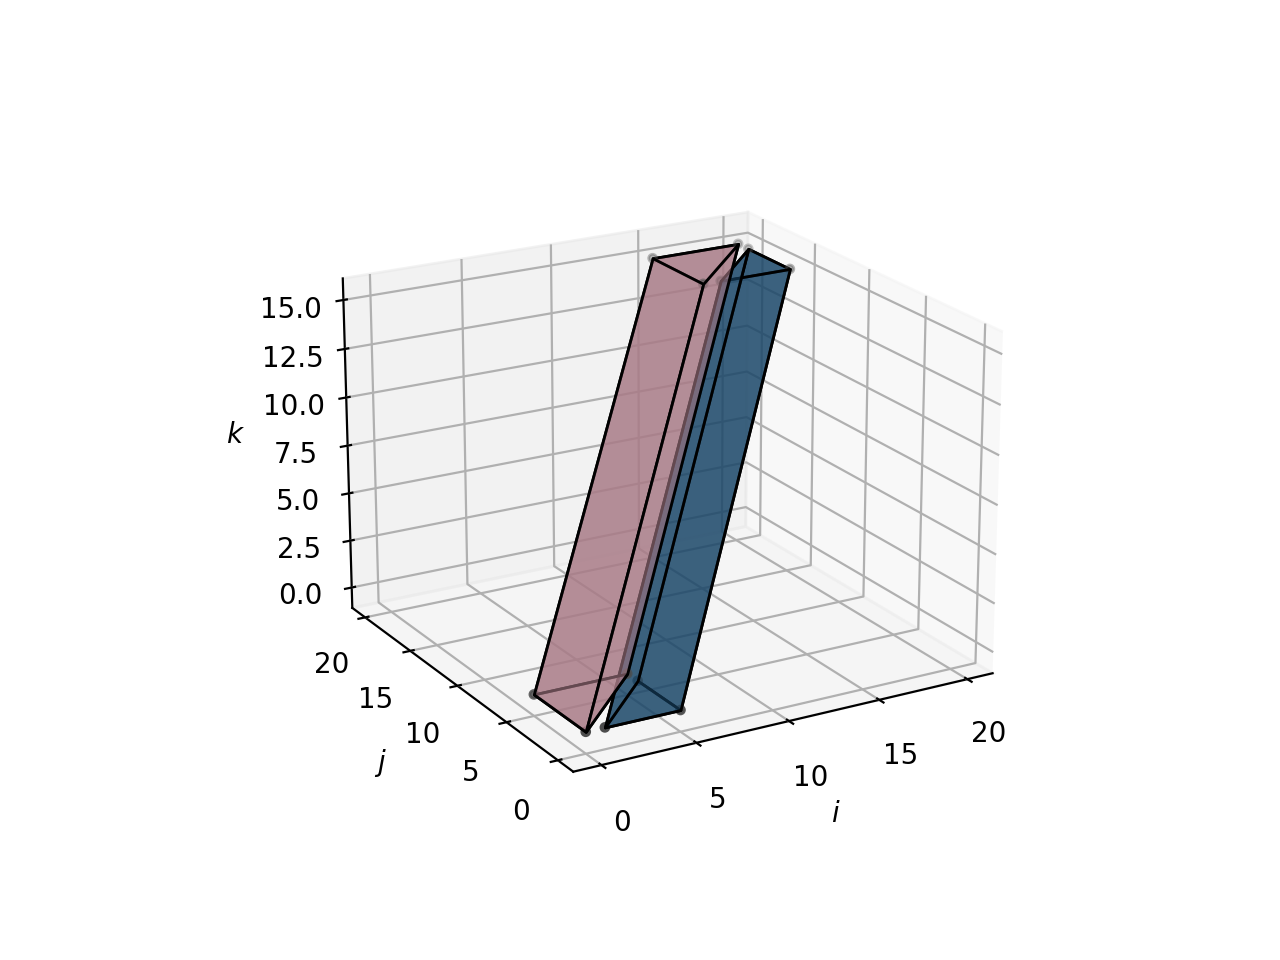

In [12]:
dom = BasicSet('[N,M]-> {[i,j,k] : -40<=i,j,k<=40 and N=5 and M=15}')

for success in successes:
    for L,R in success.get_splits():
        print(L)
        print(R)
        plot_3d_sets([p.intersect(dom) for p in [L,R]])